This example showcases the use of the EZ module in order to fit electrochemical impedance spectroscopy data recorded at different potential using an equivalent circuit.

### Equivalent circuit definition

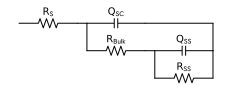

In [1]:
from EZ.model import Q, R

R_sol = R("S")
R_b = R("Bulk")
Q_b = Q("SC")
R_s = R("SS")
Q_s = Q("SS")

model = R_sol + Q_b/(R_b + Q_s/R_s)
model.print()

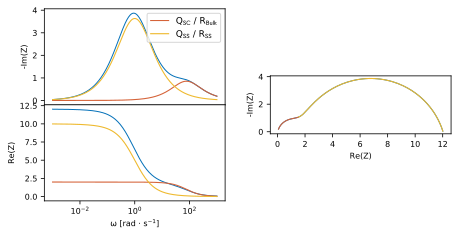

In [2]:
pars = {
    "R_S":    dict(value = 0.025, vary = False),
    "R_Bulk": dict(value = 2),
    "R_SS":   dict(value = 10),
    "Q_SC":   dict(value = 1e-2),
    "Q_SS":   dict(value = 1e-1),
    "n_SC":   dict(value = 0.9, vary = False),
    "n_SS":   dict(value = 0.8, vary = False)
}
model.plot(
    partial_models=[Q_b/R_b, Q_s/R_s],
    pars=pars
)

### Loading and plotting the EIS data

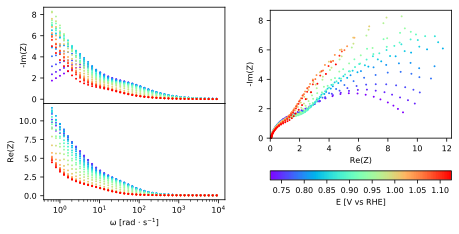

In [3]:
from EZ.data import Dataset

ds = Dataset(
    folder="data/EIS CFO pH14 light",
    pH=14,
    area=0.25
)
ds.set_freq_range([-np.inf, 1e4])
ds.plot()

### Fitting and displaying fit results

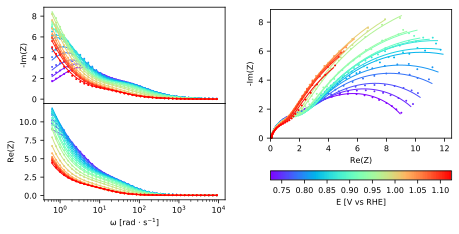

In [4]:
ds.fit(model, pars=pars)
ds.plot()